In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv(r"C:\Users\basde\OneDrive\Documenten\GitHub\Code-and-examples\Projects\Extrovert vs. Introvert Behavior Data\playground-series-s5e7\train.csv")
test = pd.read_csv(r"C:\Users\basde\OneDrive\Documenten\GitHub\Code-and-examples\Projects\Extrovert vs. Introvert Behavior Data\playground-series-s5e7\test.csv")

In [3]:
df = data.copy()
dft = test.copy()

In [4]:
observed_relationship = pd.crosstab(
    dft['Stage_fear'],
    dft['Drained_after_socializing'],
    dropna=True
)

print("Observed relationship between the two features:")
print(observed_relationship)

# We can also check the value counts for the non-null data to confirm the dominant pairs.
print("\nValue counts of non-null pairs:")
print(dft[['Stage_fear', 'Drained_after_socializing']].dropna().value_counts(normalize=True))

Observed relationship between the two features:
Drained_after_socializing    No   Yes
Stage_fear                           
No                         4055     3
Yes                           6  1098

Value counts of non-null pairs:
Stage_fear  Drained_after_socializing
No          No                           0.785548
Yes         Yes                          0.212708
            No                           0.001162
No          Yes                          0.000581
Name: proportion, dtype: float64


In [5]:
df1 = df.drop(['id','Stage_fear','Drained_after_socializing','Personality'], axis=1)
dft1 = dft.drop(['id','Stage_fear','Drained_after_socializing'], axis=1)

In [6]:
df1.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,17334.000000,17344.000000,17058.000000,17470.000000,17260.000000
mean,3.137764,5.265106,4.044319,7.996737,4.982097
std,3.003786,2.753359,2.062580,4.223484,2.879139
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,3.000000,5.000000,3.000000
50%,2.000000,5.000000,4.000000,8.000000,5.000000
75%,4.000000,8.000000,6.000000,12.000000,7.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Time_spent_Alone         17334 non-null  float64
 1   Social_event_attendance  17344 non-null  float64
 2   Going_outside            17058 non-null  float64
 3   Friends_circle_size      17470 non-null  float64
 4   Post_frequency           17260 non-null  float64
dtypes: float64(5)
memory usage: 723.7 KB


In [8]:
dft1.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,5750.000000,5778.000000,5709.000000,5825.000000,5767.000000
mean,3.116870,5.287989,4.037835,8.008412,5.028958
std,2.985658,2.758052,2.045207,4.192701,2.867285
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,3.000000,5.000000,3.000000
50%,2.000000,5.000000,4.000000,8.000000,5.000000
75%,4.000000,8.000000,6.000000,12.000000,7.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [9]:
# from sklearn.impute import KNNImputer

In [10]:
# imputer = KNNImputer(n_neighbors=10)

In [11]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [12]:
imputer = IterativeImputer(max_iter=10, random_state=42)

In [13]:
# df1 = pd.DataFrame(imputer.fit_transform(df1), columns=dft1.columns)

In [14]:
dft1 = pd.DataFrame(imputer.fit_transform(dft1), columns=dft1.columns)

In [15]:
from sklearn.preprocessing import RobustScaler

In [16]:
robust_scaler = RobustScaler()


In [17]:
# df1 = robust_scaler.fit_transform(df1)

In [18]:
dft1 = pd.DataFrame(robust_scaler.fit_transform(dft1), columns=dft1.columns, index=dft1.index)

In [19]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
from sklearn.decomposition import PCA

In [20]:
# Fit PCA to get eigenvalues
pca = PCA(n_components=dft1.shape[1])
pca.fit(dft1)
eigenvalues = pca.explained_variance_

In [21]:
# --- Suitability Checks ---

# 1. Bartlett's Test
chi_square_value, p_value = calculate_bartlett_sphericity(dft1)
print(f"Bartlett's Test Chi-Square: {chi_square_value:.3f}, P-value: {p_value:.3f}")
if p_value < 0.05:
    print("Result: The variables are correlated, and the data is suitable for factor analysis.")
else:
    print("Result: The variables are not correlated enough. Factor analysis may not be appropriate.")

print("\n" + "="*40 + "\n")

# 2. KMO Test
kmo_all, kmo_model = calculate_kmo(dft1)
print(f"KMO Test value: {kmo_model:.3f}")
if kmo_model >= 0.6:
    print("Result: The data is adequate for factor analysis.")
elif kmo_model >= 0.5:
    print("Result: The data is marginally acceptable for factor analysis.")
else:
    print("Result: The data is not adequate for factor analysis.")

Bartlett's Test Chi-Square: 15538.958, P-value: 0.000
Result: The variables are correlated, and the data is suitable for factor analysis.


KMO Test value: 0.886
Result: The data is adequate for factor analysis.


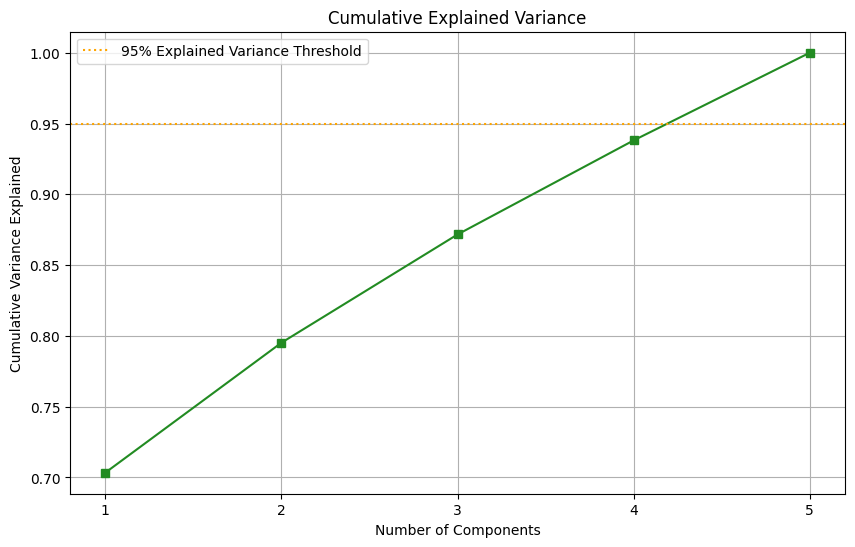

In [22]:
# --- Plot 2: Cumulative Variance (Adaptable with Fallback Test) ---

# Set the threshold 
variance_threshold = 0.95
threshold_met = True # Flag to check if the threshold was met

# --- Calculations ---
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
try:
    n_comp_variance = np.where(cumulative_variance >= variance_threshold)[0][0] + 1
except IndexError:
    
    threshold_met = False
    n_comp_variance = len(cumulative_variance)
    max_variance_val = cumulative_variance[-1]

# --- Plotting (The plot will still render correctly) ---
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 's-', color='forestgreen')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')

plt.axhline(y=variance_threshold, color='orange', linestyle=':', label=f'{int(variance_threshold*100)}% Explained Variance Threshold')

plt.legend()
plt.xticks(range(1, len(eigenvalues) + 1))
plt.grid(True)
plt.show()

In [23]:
# def parallel_analysis(data, n_iterations=100):
#     """
#     Performs Horn's Parallel Analysis to determine the number of components to retain.
#     """
#     n_rows, n_cols = data.shape
#     # Store eigenvalues from each random dataset iteration
#     random_eigenvalues = np.zeros((n_iterations, n_cols))

#     print("Running Parallel Analysis (this may take a moment)...")
#     for i in range(n_iterations):
#         # 1. Create a random dataset
#         random_data = np.random.normal(size=(n_rows, n_cols))
        
#         # 2. Run PCA on the random data
#         pca_random = PCA(n_components=n_cols)
#         pca_random.fit(random_data)
        
#         # 3. Store its eigenvalues
#         random_eigenvalues[i, :] = pca_random.explained_variance_
    
#     # 4. Calculate the average eigenvalues across all iterations
#     avg_random_eigenvalues = random_eigenvalues.mean(axis=0)
#     print("Done.")
#     return avg_random_eigenvalues

# # --- Run the corrected analysis ---
# # Get eigenvalues from the REAL data (same as before)
# pca_actual = PCA(n_components=dft1.shape[1])
# pca_actual.fit(dft1)
# eigenvalues = pca_actual.explained_variance_

# # Get the benchmark eigenvalues from RANDOM data
# random_eigenvalues = parallel_analysis(dft1)

# # --- Plotting ---
# plt.figure(figsize=(10, 6))

# # Plot 1: Actual Eigenvalues from the data (Blue)
# plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, 'o-', color='royalblue', label='Actual Eigenvalues (from data)')

# # Plot 2: Random Eigenvalues benchmark (Purple)
# plt.plot(range(1, len(random_eigenvalues) + 1), random_eigenvalues, 'd-', color='purple', alpha=0.7, label='Random Eigenvalues (Benchmark)')

# plt.title('Corrected Parallel Analysis: Actual vs. Random Eigenvalues')
# plt.xlabel('Component Number')
# plt.ylabel('Eigenvalue')
# plt.legend()
# plt.xticks(range(1, len(actual_eigenvalues) + 1))
# plt.grid(True)
# plt.show()

# # Get the number suggested by the corrected Parallel Analysis
# n_factors_pa_corrected = np.sum(eigenvalues > random_eigenvalues)

In [24]:
# # Create a DataFrame for a clear comparison
# comparison_df = pd.DataFrame({
#     'Component': range(1, len(eigenvalues) + 1),
#     'Actual Eigenvalue': eigenvalues,    'Random Eigenvalue': random_eigenvalues})

# # Calculate the difference
# comparison_df['Difference'] = comparison_df['Actual Eigenvalue'] - comparison_df['Random Eigenvalue']

# # Display the critical part of the table (e.g., the first 10 components)
# print("--- Numerical Comparison for Parallel Analysis ---")
# print(comparison_df.head(10).round(3))

In [25]:
n_components = 4
pca = PCA(n_components=n_components)

dft1 = pd.DataFrame(pca.fit_transform(dft1), index=dft1.index)

In [26]:
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.utils import resample
import numpy as np

# --- 1. Generate Diverse Base Partitions ---
# We create a list to hold all the individual clustering results
base_partitions = []
n_ensemble_members = 30 # Total number of models in our ensemble (10 of each type)
n_samples = dft1.shape[0]

# Generate partitions using different algorithms on bootstrap samples
# This creates the diversity needed for a good ensemble.
for i in range(n_ensemble_members):
    # Create a bootstrap sample (sampling with replacement)
    bootstrap_sample_indices = resample(range(n_samples), n_samples=n_samples, random_state=i)
    bootstrap_data = dft1.iloc[bootstrap_sample_indices]
    
    # Choose an algorithm based on the iteration
    if i % 3 == 0:
        # Use KMeans with a random number of clusters (2 or 3)
        n_k = np.random.randint(2, 4)
        model = KMeans(n_clusters=n_k, random_state=i, n_init='auto')
    elif i % 3 == 1:
        # Use Agglomerative Clustering
        model = AgglomerativeClustering(n_clusters=2)
    else:
        # Use Birch
        model = Birch(n_clusters=2)
        
    # Fit the model and store the labels
    labels = model.fit_predict(bootstrap_data)
    
    # We need to map the labels from the bootstrap sample back to the original data's indices
    partition = np.full(n_samples, -1, dtype=int)
    partition[bootstrap_sample_indices] = labels
    base_partitions.append(partition)

# --- 2. Build the Co-Association Matrix ---
# This matrix will store the similarity between each pair of data points.
co_association_matrix = np.zeros((n_samples, n_samples))

for partition in base_partitions:
    # Get indices of points that were actually clustered (not -1)
    active_indices = np.where(partition != -1)[0]
    
    # For each pair of points, if they are in the same cluster, increment their matrix entry
    for i in range(len(active_indices)):
        for j in range(i, len(active_indices)):
            idx1 = active_indices[i]
            idx2 = active_indices[j]
            if partition[idx1] == partition[idx2]:
                co_association_matrix[idx1, idx2] += 1
                co_association_matrix[idx2, idx1] += 1 # Matrix is symmetric

# Normalize the matrix to get similarity scores between 0 and 1
# This becomes our final similarity matrix for the last clustering step.
similarity_matrix = co_association_matrix / n_ensemble_members

# --- 3. Perform Final Clustering ---
# Use Agglomerative Clustering with the precomputed similarity matrix.
# This algorithm is ideal for grouping items based on a similarity graph.
final_clustering = AgglomerativeClustering(
    n_clusters=2,
    metric='precomputed',
    linkage='average' # 'average' linkage is often a good choice for this method
)

ensemble_labels = final_clustering.fit_predict(1 - similarity_matrix) # Needs dissimilarity

# --- 4. Assign Final Labels ---
dft1['Personality'] = ensemble_labels

# The cluster labels (0 and 1) are arbitrary. We need to assign them logically.
# We'll assume the larger cluster corresponds to 'Extrovert', which is a common pattern.
extrovert_label = dft1['Personality'].value_counts().idxmax()
introvert_label = 1 - extrovert_label

dft1['Personality'] = dft1['Personality'].map({
    extrovert_label: 'Extrovert',
    introvert_label: 'Introvert'
})

In [27]:
dft1['Personality'].value_counts()

Personality
Extrovert    4602
Introvert    1573
Name: count, dtype: int64

In [28]:
submission_df = pd.DataFrame({
    'id': dft['id'],
    'Personality': dft1['Personality']
})

In [29]:
submission_df.to_csv('submission.csv', index=False)

In [30]:
# Personality
# Extrovert    4617
# Introvert    1558
# Name: count, dtype: int64